# 311 Data Filtering
#### Agency=DEP Only
#### Complaint Types=Noise related Only
#### Input shape: (2974191, 41)
#### DEP/NOISE ONLY shape: (431986, 41)
#### Output shape: (424949, 36) *NaNs removed*

| Column Name                    | Description                                                                                                                                                                                  |
|--------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Unique Key                     | Unique identifier of a Service Request (SR) in the open data set                                                                                                                             |
| Created Date                   | Date SR  was created                                                                                                                                                                         |
| Closed Date                    | Date SR was closed by responding agency                                                                                                                                                      |
| Agency                         | Acronym of responding City Government Agency                                                                                                                                                 |
| Agency Name                    | Full Agency name of responding City Government Agency                                                                                                                                        |
| Complaint Type                 | This is the fist level of a hierarchy identifying the topic of the incident or condition. Complaint Type may have a corresponding Descriptor (below) or may stand alone.                     |
| Descriptor                     | This is  associated to the Complaint Type and provides further detail on the incident or condition. Descriptor values are dependent on the Complaint Type and are not always required in SR. |
| Status                         | Status of SR submitted                                                                                                                                                                       |
| Due Date                       | Date when responding agency is expected to update the SR.  This is based on the Complaint Type and internal Service Level Agreements (SLAs).                                                 |
| Resolution Action Updated Date | Date when responding agency last updated the SR.                                                                                                                                             |
| Resolution Description         | Describes the last action taken on the SR by the responding agency.  May describe next or future steps.                                                                                      |
| Location Type                  | Describes the type of location used in the address information                                                                                                                               |
| Incident Zip                   | Incident location zip code provided by geo validation.                                                                                                                                       |
| Incident Address               | House number of incident address provided by submitter.                                                                                                                                      |
| Street Name                    | Street name of incident address provided by the submitter                                                                                                                                    |
| Cross Street 1                 | First Cross street based on the geo validated incident location                                                                                                                              |
| Cross Street 2                 | Second Cross Street based on the geo validated incident location                                                                                                                             |
| Intersection Street 1          | First intersecting street based on geo validated incident location                                                                                                                           |
| Intersection Street 2          | Second intersecting street based on geo validated incident location                                                                                                                          |
| Address Type                   | Type of incident location information available.                                                                                                                                             |
| City                           | City of the incident location provided by geovalidation.                                                                                                                                     |
| Landmark                       | If the incident location is identified as a Landmark the name of the landmark will display here                                                                                              |
| Facility Type                  | If available this field describes the type of city facility associated to the SR                                                                                                             |
| Community Board                | Provided by geovalidation.                                                                                                                                                                   |
| BBL                            | Borough Block and Lot provided by geovalidation.  Parcel number to identify the location of location of buildings and properties in NYC.                                                     |
| Borough                        | Provided by the submitter and confirmed by geovalidation.                                                                                                                                    |
| X Coordinate (State Plane      | Geo validated X coordinate of the incident location.                                                                                                                                         |
| Y Coordinate (State Plane      | Geo validated  Y coordinate of the incident location.                                                                                                                                        |
| Open_Data_Channel_Type         | Indicates how the SR was submitted to 311.  i.e. By Phone Online Mobile Other or Unknown.                                                                                                    |
| Latitude                       | Geo based Lat of the incident location                                                                                                                                                       |
| Longitude                      | Geo based Long of the incident location                                                                                                                                                      |
| Location                       | Combination of the geo based lat & long of the incident location                                                                                                                             |
| Park Facility Name             | If the incident location is a Parks Dept facility the Name of the facility will appear here                                                                                                  |
| Park Borough                   | The borough of incident if it is a Parks Dept facility                                                                                                                                       |
| Vehicle Type                   | If the incident is a taxi this field describes the type of TLC vehicle.                                                                                                                      |
| Taxi Company Borough           | If the incident is identified as a taxi this field will display the borough of the taxi company.                                                                                             |
| Taxi Pick Up Location          | If the incident is identified as a taxi this field displays the taxi pick up location                                                                                                        |
| Bridge Highway Name            | If the incident is identified as a Bridge/Highway the name will be displayed here.                                                                                                           |
| Bridge Highway Direction       | If the incident is identified as a Bridge/Highway the direction where the issue took place would be displayed here.                                                                          |
| Road Ramp                      | If the incident location was Bridge/Highway this column differentiates if the issue was on the Road or the Ramp.                                                                             |
| Bridge Highway Segment         | Additional information on the section of the Bridge/Highway were the incident took place.                                                                                                    |

In [1]:
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import gc
from pprint import pprint


In [2]:
# __DATA_FILE_PATH__ = __YOUR_PATH_HERE__
__DATA_FILE_PATH__ = '/Users/sunghoonyang/PycharmProjects/ds_workspace/notebooks/Capstone/data/NOISE_ONLY_311_Service_Requests_from_2010_to_Present.csv'
__COMPLAINT_TYPES__ = [
'Noise - Vehicle', 'Noise - Street/Sidewalk', 'Noise - Commercial',
       'Noise - Residential', 'Noise', 'Noise - Park',
       'Noise - Helicopter', 'Noise - House of Worship',
       'Collection Truck Noise'
#     , 'Noise Survey'
]

#### Bring in raw data & Time Conversion

In [3]:
def _convert_dt(dt):
    try:
        return pd.to_datetime(dt, format='%m/%d/%Y %I:%M:%S %p')
    except:
        return np.nan

__RAW_DF__ = pd.read_csv(
    __DATA_FILE_PATH__
    , converters={k: _convert_dt for k in ['Created Date', 'Closed Date', 'Due Date' , 'Resolution Action Updated Date']}
)

/Users/sunghoonyang/PycharmProjects/groundwork-detection/groundwork-detection/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
__RAW_DF__['Complaint Type'].unique()

array(['Noise - Vehicle', 'Noise - Street/Sidewalk', 'Noise - Commercial',
       'Noise - Residential', 'Noise', 'Noise - Park',
       'Noise - Helicopter', 'Noise - House of Worship',
       'Collection Truck Noise', 'Noise Survey'], dtype=object)

In [5]:
__RAW_DF__.shape

(2974191, 41)

In [6]:
__RAW_DF__.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,37166519,2017-09-12 21:49:25,2017-09-12 22:46:43,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,10128.0,NaN,NaN,NaN,NaN,EAST 96 STREET,LEXINGTON AVENUE,INTERSECTION,NEW YORK,NaN,Precinct,Closed,2017-09-13 05:49:25,The Police Department responded to the complai...,2017-09-12 22:46:43,08 MANHATTAN,NaN,MANHATTAN,997839.0,225593.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.785866,-73.950929,"(40.785866405885606, -73.9509287180596)"
1,37166520,2017-09-12 12:56:35,2017-09-12 15:38:36,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,10029.0,NaN,NaN,NaN,NaN,LEXINGTON AVENUE,EAST 110 STREET,INTERSECTION,NEW YORK,NaN,Precinct,Closed,2017-09-12 20:56:35,The Police Department responded to the complai...,2017-09-12 15:38:36,11 MANHATTAN,NaN,MANHATTAN,999643.0,228852.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.794809,-73.944407,"(40.79480852487541, -73.9444068205819)"
2,37166852,2017-09-12 23:33:05,2017-09-13 04:49:48,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11385.0,60-49 69 AVENUE,69 AVENUE,60 STREET,60 LANE,NaN,NaN,ADDRESS,RIDGEWOOD,NaN,Precinct,Closed,2017-09-13 07:33:05,The Police Department responded to the complai...,2017-09-13 04:49:48,05 QUEENS,4.035150e+09,QUEENS,1012643.0,195295.0,MOBILE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.702671,-73.897598,"(40.70267087564103, -73.89759788223057)"
3,37166853,2017-09-12 21:11:33,2017-10-10 15:33:34,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10040.0,34 HILLSIDE AVENUE,HILLSIDE AVENUE,BEND,BEND,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,2017-09-13 05:11:33,The Police Department responded to the complai...,2017-10-10 15:33:34,12 MANHATTAN,1.021710e+09,MANHATTAN,1003813.0,252041.0,ONLINE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.858447,-73.929279,"(40.85844745053305, -73.92927888866892)"
4,37166876,2017-09-12 16:43:53,2017-09-12 17:51:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11209.0,NaN,NaN,NaN,NaN,89 STREET,3 AVENUE,INTERSECTION,BROOKLYN,NaN,Precinct,Closed,2017-09-13 00:43:53,The Police Department responded to the complai...,2017-09-12 17:51:00,10 BROOKLYN,NaN,BROOKLYN,975389.0,165659.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.621368,-74.031919,"(40.621367729773965, -74.03191912465425)"


####  Conversion to GeoDataFrame

In [7]:
from shapely.geometry import Point

crs = {'init': 'epsg:4326'}
_df = __RAW_DF__[__RAW_DF__['Agency'] == 'DEP']

def _return_pt(xy):
    try:
        return Point(*reversed(eval(str(xy))))
    except:
        return np.nan

_df['geom'] = __RAW_DF__['Location'].apply(_return_pt)
_df.shape

/Users/sunghoonyang/PycharmProjects/groundwork-detection/groundwork-detection/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


(431986, 42)

In [8]:
_df.reset_index(inplace=True)
_df.drop(labels=['index'], axis=1, inplace=True)
_df.head()

/Users/sunghoonyang/PycharmProjects/groundwork-detection/groundwork-detection/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geom
0,37167138,2017-09-12 18:21:00,2017-09-15 22:30:00,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,11216.0,1232 BEDFORD AVENUE,BEDFORD AVENUE,HANCOCK ST,HALSEY ST,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaT,The Department of Environmental Protection det...,2017-09-15 22:30:00,03 BROOKLYN,3.020000e+09,BROOKLYN,997116.0,187685.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681819,-73.953612,"(40.68181938473442, -73.95361203646364)",POINT (-73.95361203646364 40.68181938473442)
1,37167300,2017-09-12 22:57:00,2017-10-12 20:15:00,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,11215.0,226 4 AVENUE,4 AVENUE,UNION ST,PRESIDENT ST,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaT,The Department of Environmental Protection did...,2017-10-12 20:15:00,06 BROOKLYN,3.004410e+09,BROOKLYN,988922.0,186023.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.677266,-73.983156,"(40.67726568902946, -73.98315639991446)",POINT (-73.98315639991446 40.67726568902946)
2,37167315,2017-09-12 06:51:00,2017-09-26 08:00:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11221.0,705 HART STREET,HART STREET,CENTRAL AVE,WILSON AVE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaT,The Department of Environmental Protection obs...,2017-09-26 08:00:00,04 BROOKLYN,3.032180e+09,BROOKLYN,1004972.0,194084.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699368,-73.925268,"(40.6993682539414, -73.92526780051861)",POINT (-73.92526780051861 40.6993682539414)
3,37167316,2017-09-12 22:56:00,2017-09-20 00:45:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10022.0,EAST 59 STREET,EAST 59 STREET,PARK AVENUE,LEXINGTON AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Closed,NaT,The Department of Environmental Protection did...,2017-09-20 00:45:00,08 MANHATTAN,NaN,MANHATTAN,992854.0,217094.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.762545,-73.968941,"(40.76254513902991, -73.96894094768926)",POINT (-73.96894094768926 40.76254513902991)
4,37167317,2017-09-12 13:15:00,2017-09-18 23:30:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11105.0,20-25 SHORE BOULEVARD,SHORE BOULEVARD,20 AVE,20 RD,NaN,NaN,ADDRESS,Astoria,NaN,NaN,Closed,NaT,The Department of Environmental Protection did...,2017-09-18 23:30:00,01 QUEENS,4.008940e+09,QUEENS,1007519.0,225392.0,ONLINE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.785295,-73.915974,"(40.78529452987405, -73.9159739519109)",POINT (-73.9159739519109 40.78529452987405)


In [9]:
# Identify records with np.nan. Acquire indices.
geom_nan_ix = np.where(_df['geom'].isnull())[0]

# Count b4 for Audit
_orig_cnt = _df.shape[0]
_nan_cnt = len(geom_nan_ix)
_diff_cnt = _df.shape[0] - len(geom_nan_ix)
print(
    '# Orignal:{} - # nan: {} = {}'.format(
        _orig_cnt
        , _nan_cnt
        , _diff_cnt
    )
)

# Drop Op.: check that count agrees
_df.drop(labels=geom_nan_ix, inplace=True)
_df.shape

# Orignal:431986 - # nan: 6999 = 424987


/Users/sunghoonyang/PycharmProjects/groundwork-detection/groundwork-detection/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(424987, 42)

In [10]:
gdf = gpd.GeoDataFrame(_df, crs=crs, geometry='geom')
gdf.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geom
0,37167138,2017-09-12 18:21:00,2017-09-15 22:30:00,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,11216.0,1232 BEDFORD AVENUE,BEDFORD AVENUE,HANCOCK ST,HALSEY ST,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaT,The Department of Environmental Protection det...,2017-09-15 22:30:00,03 BROOKLYN,3.020000e+09,BROOKLYN,997116.0,187685.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681819,-73.953612,"(40.68181938473442, -73.95361203646364)",POINT (-73.95361203646364 40.68181938473442)
1,37167300,2017-09-12 22:57:00,2017-10-12 20:15:00,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,11215.0,226 4 AVENUE,4 AVENUE,UNION ST,PRESIDENT ST,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaT,The Department of Environmental Protection did...,2017-10-12 20:15:00,06 BROOKLYN,3.004410e+09,BROOKLYN,988922.0,186023.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.677266,-73.983156,"(40.67726568902946, -73.98315639991446)",POINT (-73.98315639991446 40.67726568902946)
2,37167315,2017-09-12 06:51:00,2017-09-26 08:00:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11221.0,705 HART STREET,HART STREET,CENTRAL AVE,WILSON AVE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaT,The Department of Environmental Protection obs...,2017-09-26 08:00:00,04 BROOKLYN,3.032180e+09,BROOKLYN,1004972.0,194084.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699368,-73.925268,"(40.6993682539414, -73.92526780051861)",POINT (-73.92526780051861 40.6993682539414)
3,37167316,2017-09-12 22:56:00,2017-09-20 00:45:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10022.0,EAST 59 STREET,EAST 59 STREET,PARK AVENUE,LEXINGTON AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Closed,NaT,The Department of Environmental Protection did...,2017-09-20 00:45:00,08 MANHATTAN,NaN,MANHATTAN,992854.0,217094.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.762545,-73.968941,"(40.76254513902991, -73.96894094768926)",POINT (-73.96894094768926 40.76254513902991)
4,37167317,2017-09-12 13:15:00,2017-09-18 23:30:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11105.0,20-25 SHORE BOULEVARD,SHORE BOULEVARD,20 AVE,20 RD,NaN,NaN,ADDRESS,Astoria,NaN,NaN,Closed,NaT,The Department of Environmental Protection did...,2017-09-18 23:30:00,01 QUEENS,4.008940e+09,QUEENS,1007519.0,225392.0,ONLINE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.785295,-73.915974,"(40.78529452987405, -73.9159739519109)",POINT (-73.9159739519109 40.78529452987405)


In [12]:
nb_shp = gpd.read_file('../data/Neighborhood Tabulation Areas/geo_export_734cc588-a881-4394-bdd7-9f757b306aa4.shp')

In [13]:
nb_shp['ntaname']

0                                           Borough Park
1                                            Murray Hill
2                                          East Elmhurst
3                                                 Hollis
4                                         Manhattanville
5                              Springfield Gardens North
6                                  Westchester-Unionport
7                                  Bayside-Bayside Hills
8                                              Homecrest
9                                                Erasmus
10                                  Fresh Meadows-Utopia
11                               Turtle Bay-East Midtown
12                                              Longwood
13                                            St. Albans
14                                                Corona
15                                          Clinton Hill
16                            Jamaica Estates-Holliswood
17                             

<Figure size 432x288 with 0 Axes>

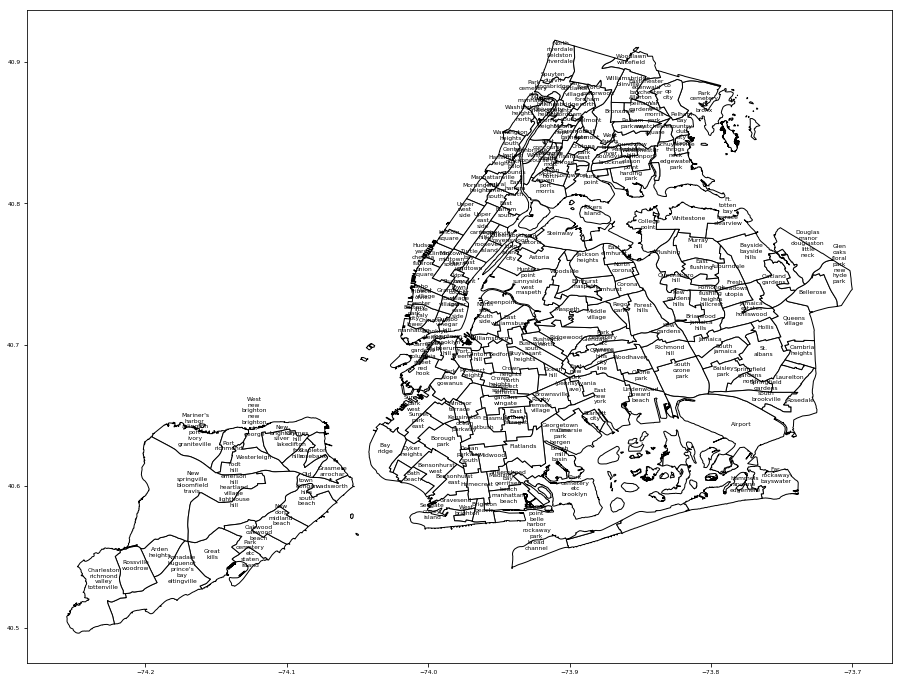

In [14]:
plt.clf()

font = {
#     'weight' : 'bold',
    'size'   : 6
}

matplotlib.rc('font', **font)

ax = nb_shp.plot(color='white', edgecolor='black', figsize=(16, 12))
_coords = nb_shp['geometry'].apply(lambda x: x.representative_point().coords[:])
_coords = [_coords[0] for _coords in _coords]

for idx, row in nb_shp.iterrows():
    ax.annotate(
        s=row['ntaname'].strip().replace(' ','\n').replace('-','\n').strip().capitalize()
        , xy=_coords[idx]
        , horizontalalignment='center'
    )

In [15]:
_c = [c for c in gdf.columns.tolist() if c != 'geom']
_c.extend(['ntacode', 'geometry'])


noise_dt_nb_label = gpd.sjoin(
    gdf
    , nb_shp
    , op='within'
)

noise_dt_nb_label.head()

/Users/sunghoonyang/PycharmProjects/groundwork-detection/groundwork-detection/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geom,index_right,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng
0,37167138,2017-09-12 18:21:00,2017-09-15 22:30:00,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,11216.0,1232 BEDFORD AVENUE,BEDFORD AVENUE,HANCOCK ST,HALSEY ST,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaT,The Department of Environmental Protection det...,2017-09-15 22:30:00,03 BROOKLYN,3.020000e+09,BROOKLYN,997116.0,187685.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681819,-73.953612,"(40.68181938473442, -73.95361203646364)",POINT (-73.95361203646364 40.68181938473442),15,3.0,Brooklyn,047,BK69,Clinton Hill,2.052820e+07,23971.465822
233,37175947,2017-09-13 14:58:00,2017-09-13 15:36:00,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11205.0,219 WASHINGTON AVENUE,WASHINGTON AVENUE,MYRTLE AVE,WILLOUGHBY AVE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaT,The Department of Environmental Protection det...,2017-09-13 15:36:00,02 BROOKLYN,3.019040e+09,BROOKLYN,993497.0,191488.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.692262,-73.966655,"(40.6922622678706, -73.96665500760106)",POINT (-73.96665500760106 40.6922622678706),15,3.0,Brooklyn,047,BK69,Clinton Hill,2.052820e+07,23971.465822
264,37177534,2017-09-13 03:13:00,2017-09-13 21:26:00,DEP,Department of Environmental Protection,Noise,Noise: Alarms (NR3),NaN,11238.0,101 QUINCY STREET,QUINCY STREET,CLASSON AVE,FRANKLIN AVE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaT,The Department of Environmental Protection res...,2017-09-13 21:26:00,03 BROOKLYN,3.019700e+09,BROOKLYN,996060.0,189277.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.686191,-73.957417,"(40.68619053293611, -73.95741662072693)",POINT (-73.95741662072693 40.68619053293611),15,3.0,Brooklyn,047,BK69,Clinton Hill,2.052820e+07,23971.465822
501,37188522,2017-09-14 18:55:00,2017-09-19 10:34:00,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11238.0,510 WASHINGTON AVENUE,WASHINGTON AVENUE,GATES AVE,FULTON ST,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaT,The Department of Environmental Protection det...,2017-09-19 10:34:00,02 BROOKLYN,3.019780e+09,BROOKLYN,993977.0,188377.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.683723,-73.964929,"(40.68372277301225, -73.96492860317981)",POINT (-73.96492860317981 40.68372277301225),15,3.0,Brooklyn,047,BK69,Clinton Hill,2.052820e+07,23971.465822
600,37193930,2017-09-15 06:06:00,2017-09-29 07:00:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11238.0,1068 FULTON STREET,FULTON STREET,CLASSON AVE,CLAVER PL,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaT,The Department of Environmental Protection did...,2017-09-29 07:00:00,03 BROOKLYN,3.020160e+09,BROOKLYN,995861.0,187619.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681640,-73.958137,"(40.68163996496247, -73.95813701299446)",POINT (-73.95813701299446 40.68163996496247),15,3.0,Brooklyn,047,BK69,Clinton Hill,2.052820e+07,23971.465822


In [16]:
_df = noise_dt_nb_label.groupby(['ntaname']).count()
_df.sort_values('Created Date', axis=0, ascending=False, inplace=True)
_df.iloc[:, 1].head(15)

ntaname
Hudson Yards-Chelsea-Flatiron-Union Square          19327
Midtown-Midtown South                               14899
Upper West Side                                     14201
Battery Park City-Lower Manhattan                   13700
SoHo-TriBeCa-Civic Center-Little Italy              13510
West Village                                        13092
Turtle Bay-East Midtown                             10866
Yorkville                                           10090
Clinton                                              9771
Murray Hill-Kips Bay                                 8830
Lenox Hill-Roosevelt Island                          8522
Upper East Side-Carnegie Hill                        8319
Lincoln Square                                       7715
East Village                                         7579
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill     7459
Name: Created Date, dtype: int64

In [17]:
noise_dt_nb_label.drop(
    labels=[
        'Unique Key', 'Location Type', 'Intersection Street 1', 'Intersection Street 2', 'Landmark', 'Facility Type',
        'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'index_right'
    ]
    , axis=1
    , inplace=True
)

In [18]:
noise_dt_nb_label.to_csv(
    '../data/DEP_NTANM_NZONLY_311_Service_Requests_from_2010_to_Present.csv'
    ,index=False
)